In [1]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import dhlab.module_update as mu
import pandas as pd

In [2]:
mu.update('dhlab_v2')

Updated file `C:\Users\yoons\Documents\Github\Qualico2020\dhlab_v2.py`

In [3]:
mu.update('wordbank')
import wordbank as wb

Updated file `C:\Users\yoons\Documents\Github\Qualico2020\wordbank.py`

In [4]:
import dhlab_v2 as d2

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'figure.figsize':(14,7), 'lines.linewidth': 6})

In [6]:
#plt.rcParams.keys()

In [7]:
corpus = d2.document_corpus(from_year = 1990, to_year = 2020, limit = 50)

In [8]:
corpus = d2.document_corpus(doctype='digibok', from_year = 1990, to_year = 2020, limit = 50)

In [9]:
d2.konkordans(urns = list(corpus.urn), query="""  "hans arm"   """).style

,docid,urn,conc


In [10]:
d2.konkordans(urns = list(corpus.urn), query="NEAR(hans hode, 0) OR NEAR(hans hodet, 0)""")[['urn', 'conc']].style

,urn,conc
0,URN:NBN:no-nb_digibok_2021011207608,"... Jeg spurte ham hva som var den første tanken som ville fare gjennom hodet hans , hvis han var involvert i en lignende ulykke . »"
1,URN:NBN:no-nb_digibok_2021011207608,... Hodet hans gikk opp og ned som om han akkurat hadde fått vite svaret på en dypsindig gåte . « Ali Masud tok journalen med seg hjem...
2,URN:NBN:no-nb_digibok_2021011207608,Han så opp akkurat tidsnok til å se den svære knyttneven hennes komme farende gjennom luften mot hodet hans . Han sto på knærne mellom bilen...
3,URN:NBN:no-nb_digibok_2021011207608,"... En annen mann tok et håndkle , og seiv om politibetjenten gjorde motstand , klarte han å surre det rundt hodet hans og knyte det stramt i..."
4,URN:NBN:no-nb_digibok_2021011207608,"« Vent litt , » advarte Harvath idet noe Rodriguez hadde sagt fløy gjennom hodet hans . « Det vet vi ikke . Alle forholder seg rolig . »"
5,URN:NBN:no-nb_digibok_2021011207608,"Harvath ble absolutt nysgjerrig , men hadde ikke tid til å stille de spørsmålene som for gjennom hodet hans . « Vi kommer ut med pasienten din om..."
6,URN:NBN:no-nb_digibok_2021011207608,"Ingenting av det som for gjennom hodet hans , kunne vært lenger fra sannheten , men Peio hadde glidd inn i en svært farlig psykisk og følelsesmessig..."
7,URN:NBN:no-nb_digibok_2013080608061,"... Den andre skjøt mot meg , men jeg var pk ham med kolben og slo et lett slag mot siden av hodet hans ."
8,URN:NBN:no-nb_digibok_2013080608061,"Jeg gikk stille bortover mot ham , stanset like bak og over ham og så et øyeblikk ned på det skallete hodet hans ."
9,URN:NBN:no-nb_digibok_2020080407021,"... Sånn at noen kan dra den hvite dyna helt over hodet hans , sånn man gjør med døde mennesket . Og ved siden av senga sitter mamma..."


In [11]:
d2.konkordans(urns = list(d2.document_corpus(from_year = 1990, to_year = 2020, limit = 500, doctype='digibok').urn), query="NEAR(hans legger, 0) OR NEAR(hans leggene, 0)""").style

,docid,urn,conc
0,100098436,URN:NBN:no-nb_digibok_2012073108199,"Han sukket og trakk henne tettere inntil seg , så de kraftige leggene hans presset seg mot hennes ."
1,100336925,URN:NBN:no-nb_digibok_2009081904006,"det som var igjen av leggene hans og i saltdomen som hadde erstattet det venstre kneet , snudde seg et par ganger og sendte ut små..."
2,100193038,URN:NBN:no-nb_digibok_2014022106062,"Hun løftet teppet til side og begynte å gni den tykke , gulaktige salven på føttene og leggene hans . Han smilte takknemlig til henne ."
3,100419335,URN:NBN:no-nb_digibok_2020091607725,"... Mens jeg tømmer våpenet hans , legger jeg merke til at han øver seg på svømmetakene , blikket vendt framover , finner gropa igjen , noterer seg den i..."
4,100558772,URN:NBN:no-nb_digibok_2007083001064,"... De vide buksebena var forsvarlig knyttet midt på leggen med hyssing , slik at ikke vettskremte rotter skulle flykte oppover leggene hans mens han jobbet . Den..."
5,100386064,URN:NBN:no-nb_digibok_2019010748500,... De grove hårene på leggene hans pirret den overfølsomme huden min.
6,100386064,URN:NBN:no-nb_digibok_2019010748500,"Jeg hektet beina mine rundt leggene hans og skjøv hendene under bukselinningen for å gripe den stramme , harde rumpa hans . Jeg dro ham mot meg..."


In [12]:
def check_bi(noundef, noun, pron = 'hans', yf = 1990, yt = 2020, sample = 500):
    urns = list(d2.document_corpus(from_year = yf, to_year = yt, limit = sample, doctype='digibok').urn)
    res = d2.konkordans(urns = urns, query="NEAR({pron} {noun}, 0) OR NEAR({pron} {noundef}, 0)""".format(pron = pron, noundef = noundef, noun = noun)).style
    return res

In [13]:
%%time
check_bi("arm", "armen", "min", sample = 5)

Wall time: 1.06 s


,docid,urn,conc


In [14]:
nb.nb_ngram("armen min, min arm", years=(1910, 2010), smooth=1, corpus='bok').sort_index()

,armen min,min arm
1910,NaN,0.000128
1911,0.000033,0.000088
1912,NaN,0.000115
1913,NaN,0.000176
1914,0.000037,0.000181
...,...,...
2006,0.000111,0.000023
2007,0.000084,0.000013
2008,0.000099,0.000012
2009,0.000131,0.000014


In [31]:
def bigrams_cross(list_of_first, list_of_second, mode = 'relative'):
    return pd.concat([nb.nb_ngram("{n} {p}".format(n = n, p = p), smooth = 1, mode = mode, years=(1910, 2000)) for n in list_of_first for p in list_of_second], axis = 1).mean(axis = 1)

In [40]:
import matplotlib as plt

In [48]:
def bigrams_cross_div(l11, l12, l21, l22, mode = 'abs', title = 'post/pre', ref = True, window = 5):
    a = bigrams_cross(l11, l12, mode = mode).rolling(window=window).mean()
    b = bigrams_cross(l21, l22, mode = mode).rolling(window=window).mean()
    df = pd.DataFrame(a/b, columns = [title])
    df['r'] = 1
    return df

<AxesSubplot:>

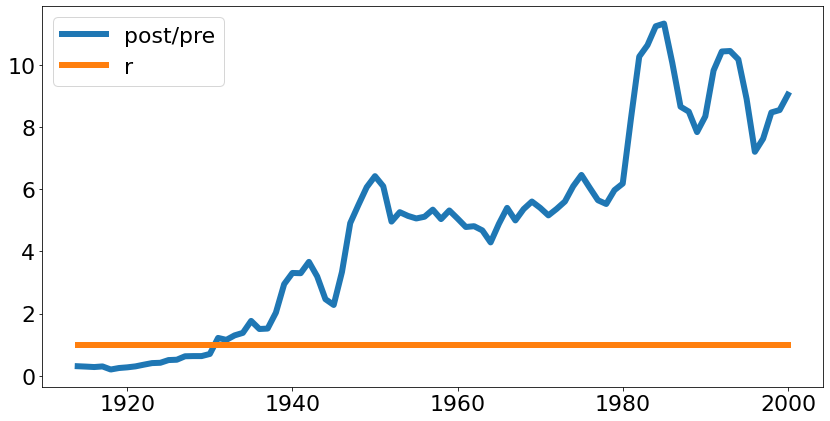

In [46]:
bigrams_cross_div('armen'.split(), 'min din hans hennes'.split(), 'min din hans hennes'.split(), 'arm'.split()).rolling(window=5).mean().plot()


<AxesSubplot:>

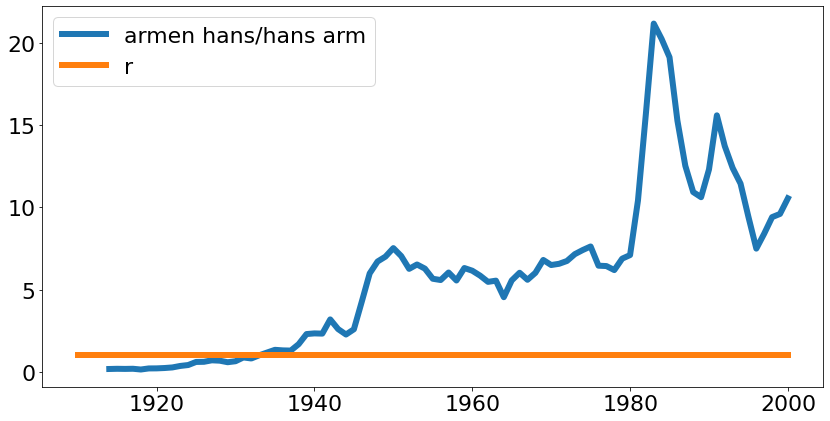

In [49]:
bigrams_cross_div('armen'.split(), 'hans'.split(), 
                  'hans'.split(), 'arm'.split(), title = "armen hans/hans arm").plot()


<AxesSubplot:>

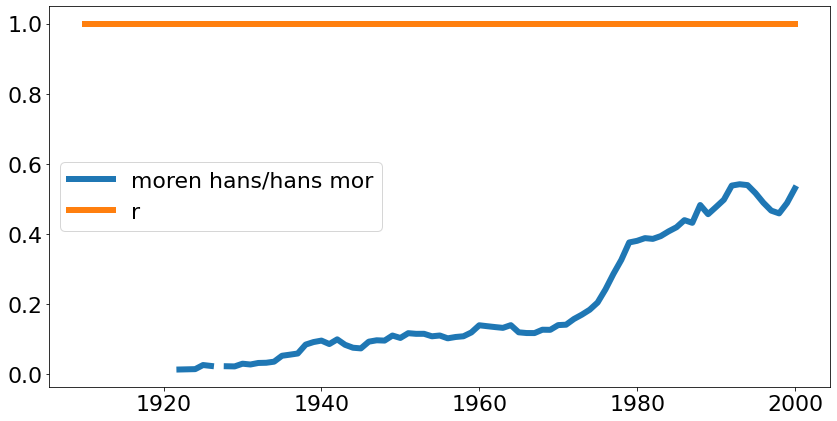

In [50]:
bigrams_cross_div('moren'.split(), 'hans'.split(), 
                  'hans'.split(), 'mor'.split(), title = "moren hans/hans mor").plot()


<AxesSubplot:>

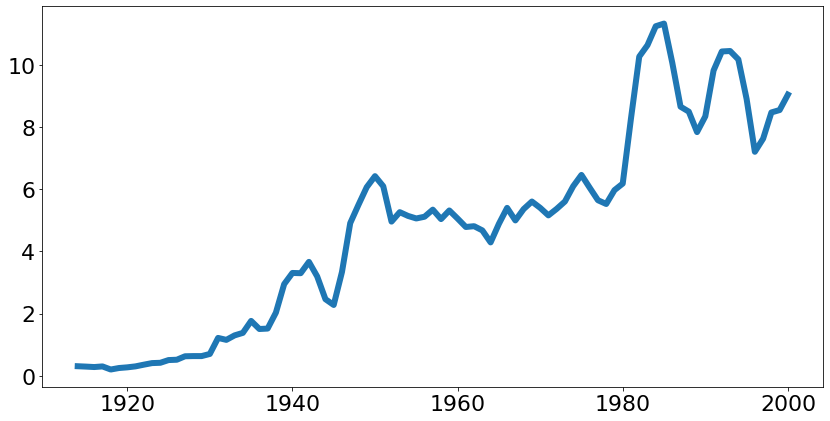

In [39]:
bigrams_cross_div('armen'.split(), 'min din hans hennes'.split(), 'min din hans hennes'.split(), 'arm'.split(), mode = 'abs' ).rolling(window=5).mean().plot()

General

<AxesSubplot:>

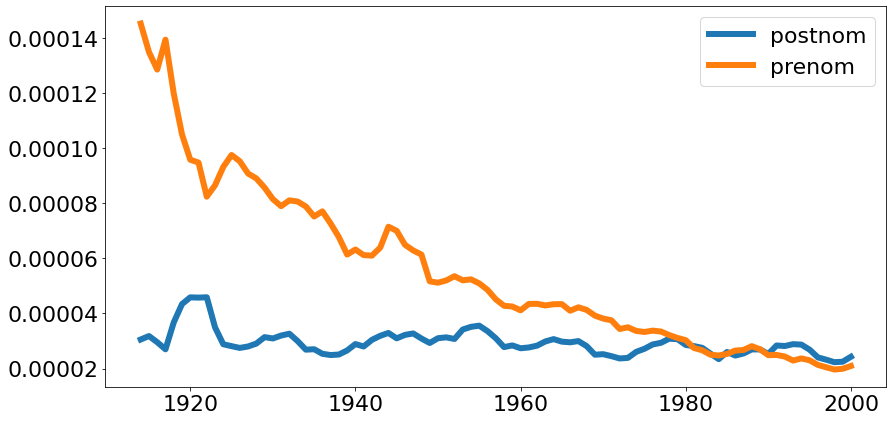

In [16]:
pd.DataFrame(
    {'postnom': bigrams_cross('bilen båten hytta hytten huset veien tårnet filmen stykket'.split(), 'min mitt din ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mitt din ditt hennes hans'.split(), 'bil båt hytte hus tårn film stykke'.split())}).rolling(window=5).mean().plot()

<AxesSubplot:>

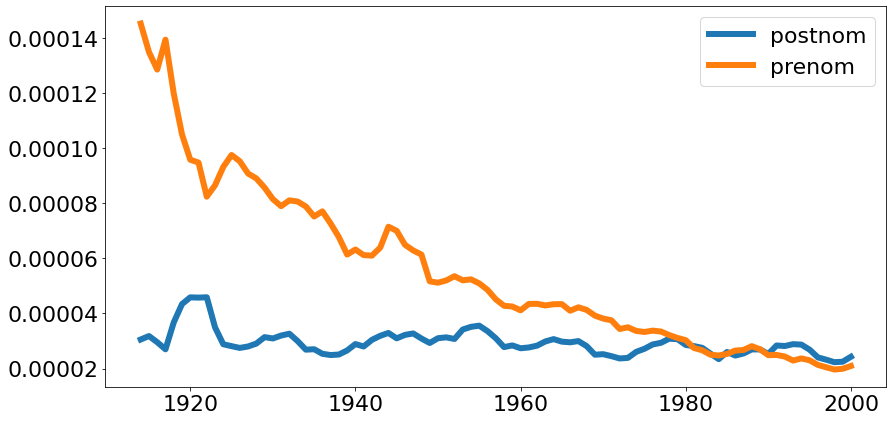

In [16]:
pd.DataFrame(
    {'postnom': bigrams_cross('bilen båten hytta hytten huset veien tårnet filmen stykket'.split(), 'min mitt din ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mitt din ditt hennes hans'.split(), 'bil båt hytte hus tårn film stykke'.split())}).rolling(window=5).mean().plot()

<AxesSubplot:>

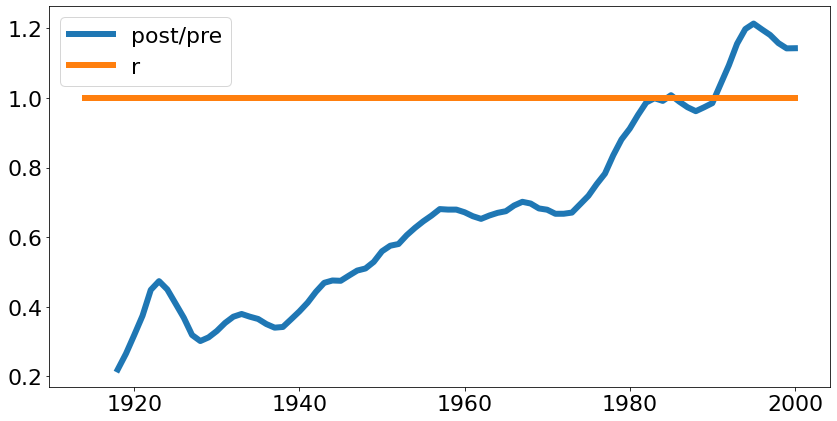

In [52]:
bigrams_cross_div('bilen båten hytta hytten huset veien tårnet filmen stykket'.split(), 
                  'min mitt din ditt hennes hans'.split(),
     'min mitt din ditt hennes hans'.split(), 'bil båt hytte hus tårn film stykke'.split()).rolling(window=5).mean().plot()

# Bodyparts

<AxesSubplot:>

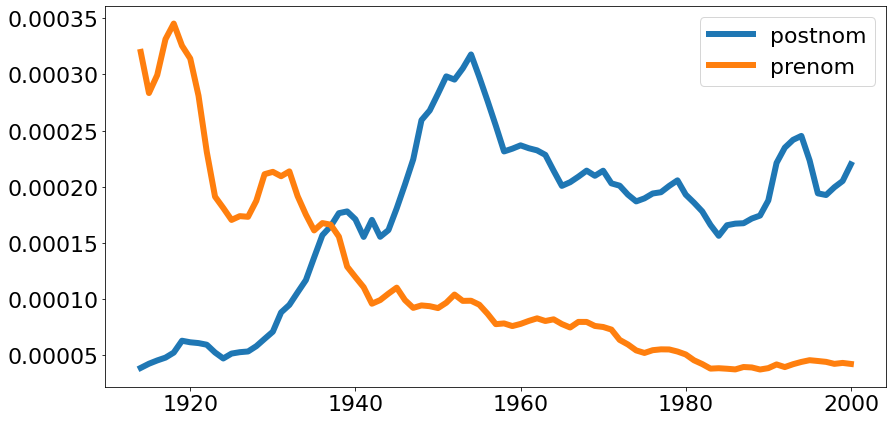

In [17]:
pd.DataFrame(
    {'postnom': bigrams_cross('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split())}).rolling(window=5).mean().plot()

<AxesSubplot:>

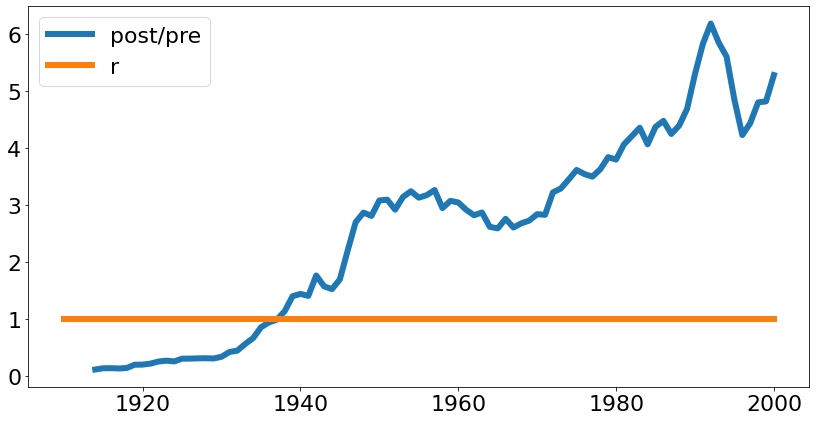

In [53]:
bigrams_cross_div('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 
                  'min mine mitt din dine ditt hennes hans'.split(),
'min mine mitt din dine ditt hennes hans'.split(), 
'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split()).plot()

# Family

<AxesSubplot:>

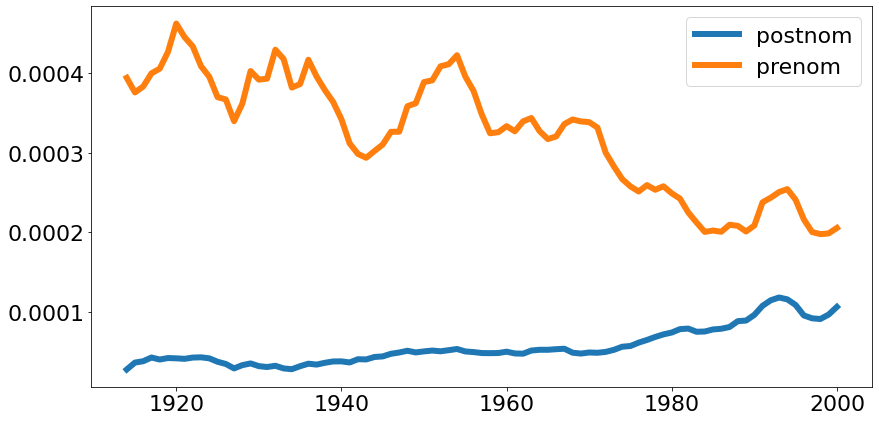

In [18]:
pd.DataFrame(
    {'postnom': bigrams_cross('moren faren sønnen søsteren broren tanten onkelen'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'mor far søster bror tante onkel'.split())}).rolling(window=5).mean().plot()

<AxesSubplot:>

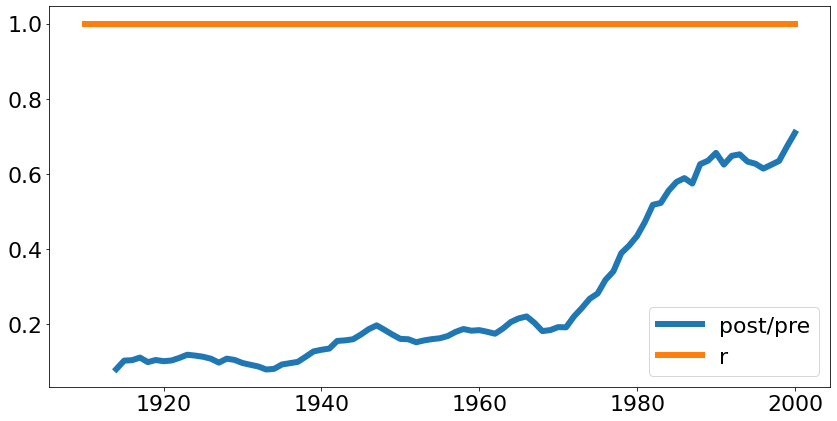

In [54]:
bigrams_cross_div('moren faren sønnen søsteren broren tanten onkelen'.split(),
                  'min mine mitt din dine ditt hennes hans'.split(),
     'mine mitt din dine ditt hennes hans'.split(), 
                            'mor far søster bror tante onkel'.split()).plot()

<AxesSubplot:>

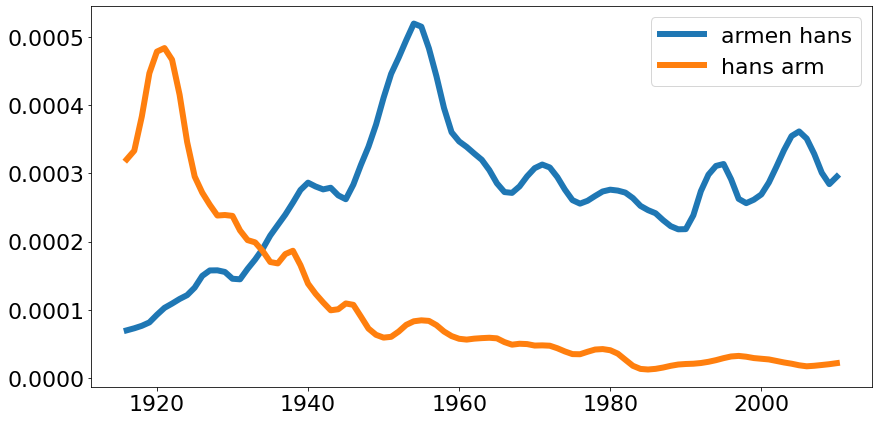

In [19]:
nb.nb_ngram("armen hans, hans arm", years=(1910, 2010), corpus='bok').sort_index().rolling(window=5).mean().plot()

<AxesSubplot:>

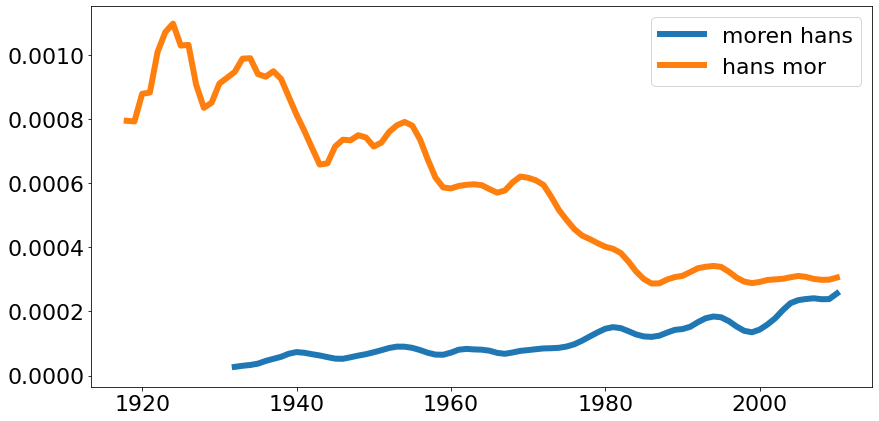

In [20]:
nb.nb_ngram("moren hans, hans mor", years=(1910, 2010), corpus='bok').sort_index().rolling(window=5).mean().plot()

# Genitive effect

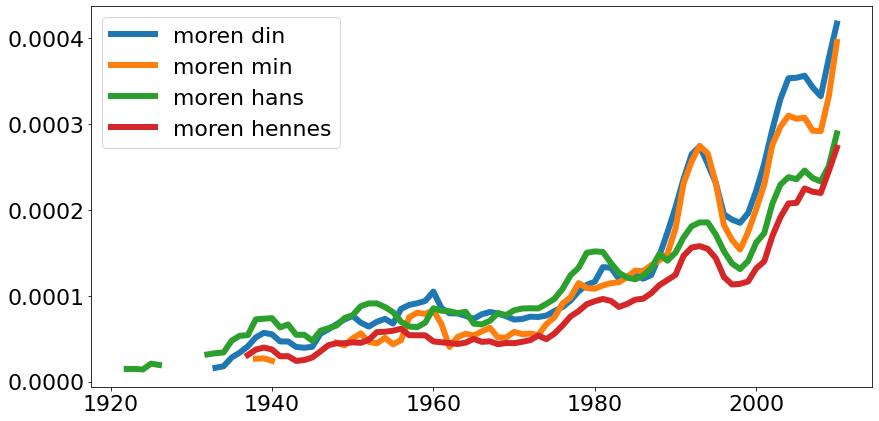

In [21]:
nb.nb_ngram("moren din, moren min, moren hans, moren hennes", years=(1910, 2010), corpus='bok', smooth = 1).sort_index().rolling(window=5).mean().plot();

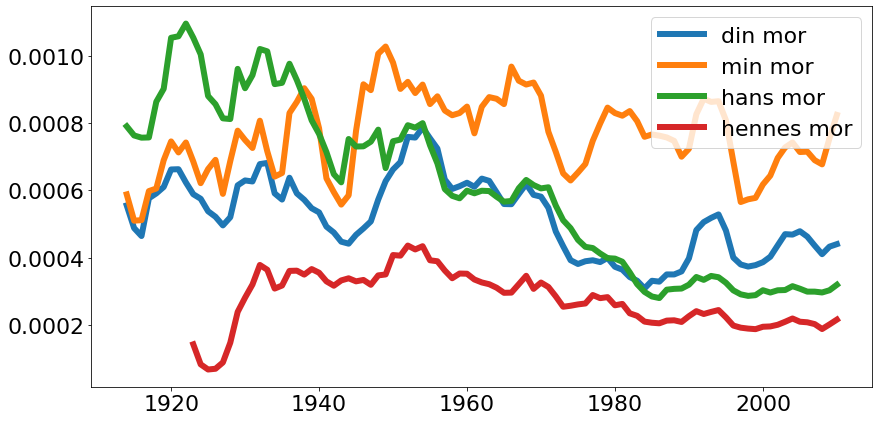

In [22]:
nb.nb_ngram("din mor, min mor, hans mor, hennes mor", years=(1910, 2010), corpus='bok', smooth = 1).sort_index().rolling(window=5).mean().plot();

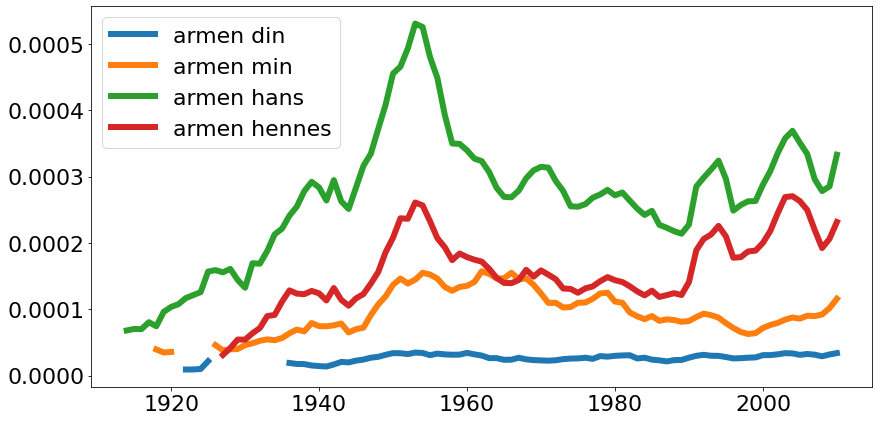

In [23]:
nb.nb_ngram("armen din, armen min, armen hans, armen hennes", years=(1910, 2010), corpus='bok', smooth=1).sort_index().rolling(window=5).mean().plot();

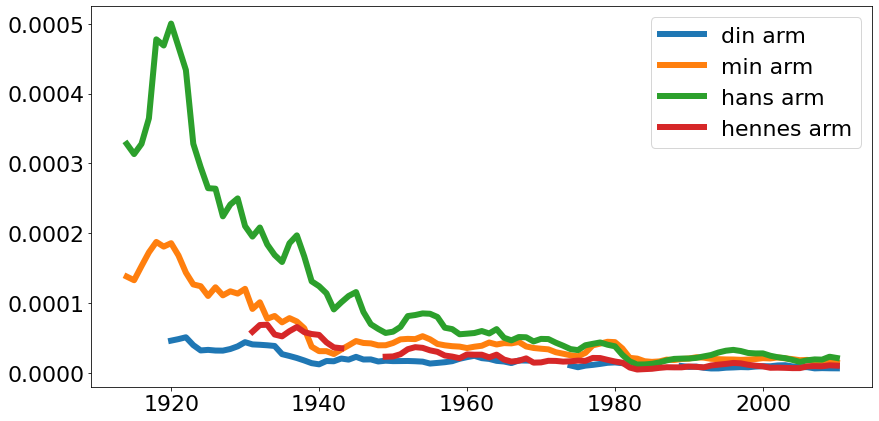

In [24]:
nb.nb_ngram("din arm, min arm, hans arm, hennes arm", years=(1910, 2010), corpus='bok', smooth=1).sort_index().rolling(window=5).mean().plot();

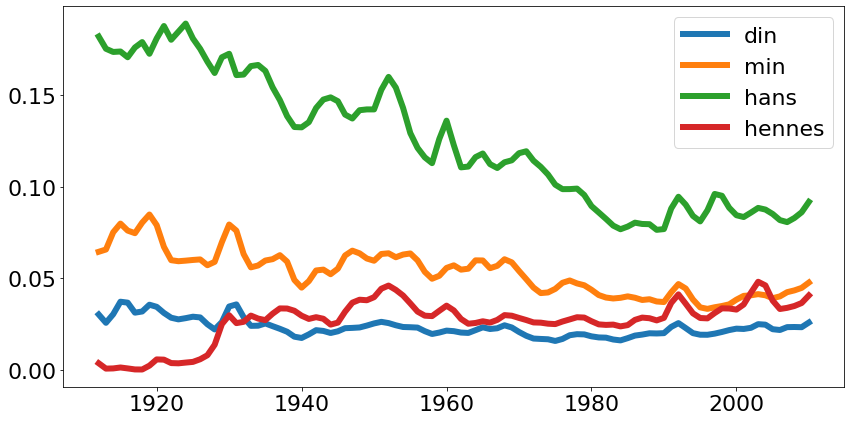

In [25]:
nb.nb_ngram(" din,  min,  hans,  hennes", years=(1910, 2010), corpus='bok').sort_index().plot();

<AxesSubplot:>

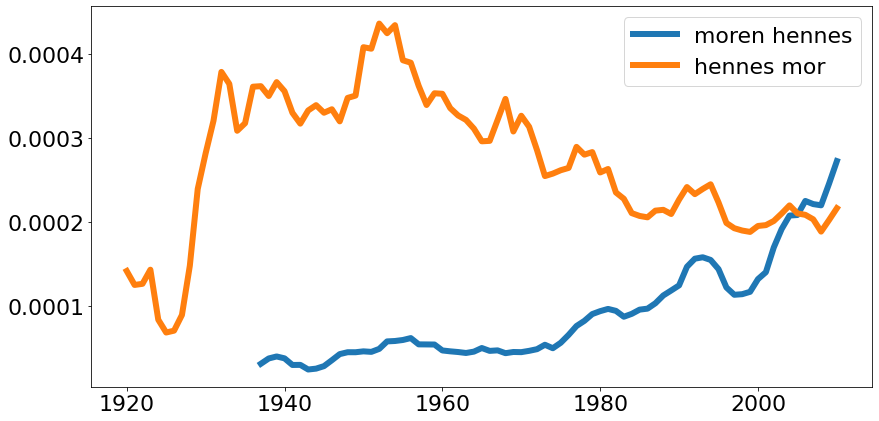

In [26]:
nb.nb_ngram("moren hennes, hennes mor", years=(1910, 2010), smooth = 1).sort_index().rolling(window=5).mean().plot()

<AxesSubplot:>

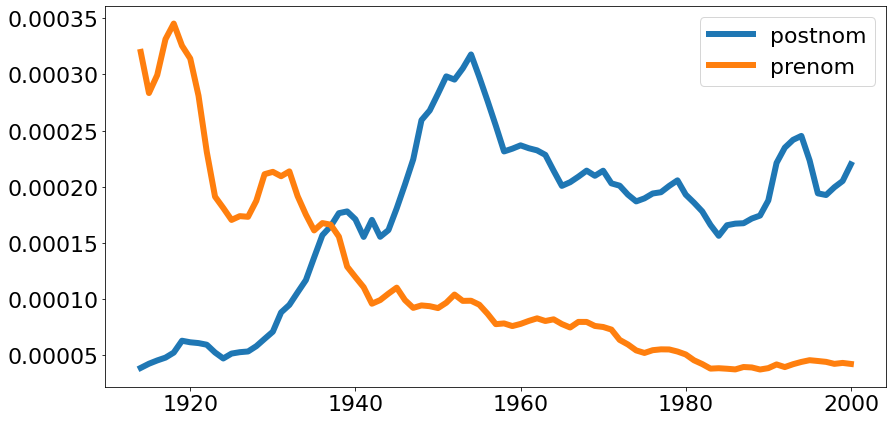

In [27]:
pd.DataFrame(
    {'postnom': bigrams_cross('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split())}).rolling(window=5).mean().plot()

# Random nouns and selected nouns

In [28]:
tots = nb.totals(2500)

words = list({x.lower() for x in tots})

tagged_words = wb.word_form_many(words)

tagged_words[:10]

nouns = list(set([x[0] for x in tagged_words if 'subst' in x[1]]))

In [29]:
from random import sample

In [196]:
def sample_nouns(nouns, n = 50):
    s1 = sample(nouns, n)
    s1_def_indef = [[x for x in wb.word_variant(w, 'subst') if 'ent ub normert' in x[0] or 'ent be normert' in x[0]] for w in s1]
    pairs = [(x[0][1], x[1][1]) for x in s1_def_indef if x != []]
    return pairs

In [189]:
gens = 'min mine mitt din dine ditt hennes hans'.split()

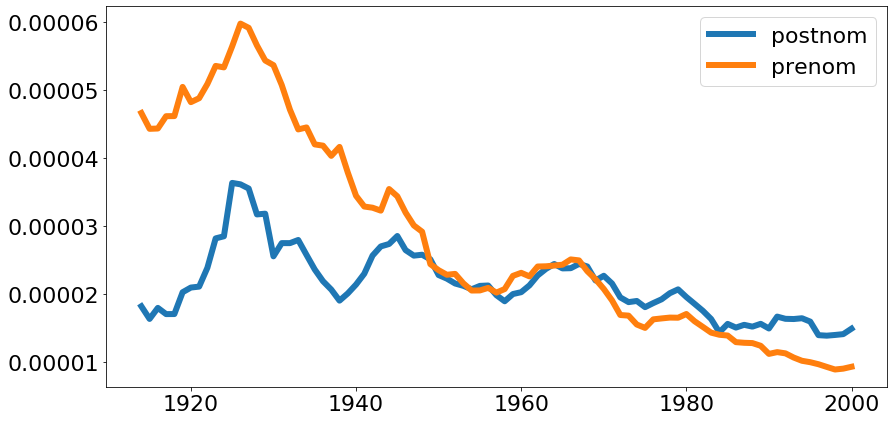

In [193]:
pairs = sample_nouns(nouns, n = 20)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


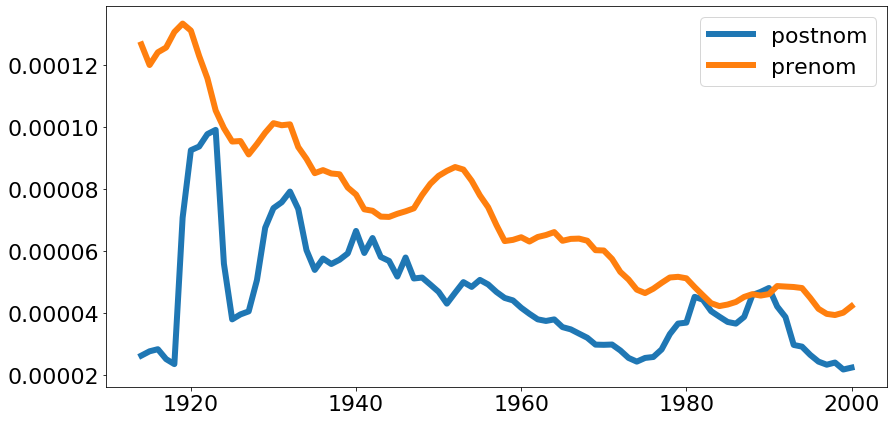

In [198]:
pairs = sample_nouns(nouns, n = 20)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


[('menten', 'mente'), ('ungen', 'unge'), ('dagen', 'dag'), ('retta', 'rette'), ('ganga', 'gange'), ('omen', 'om'), ('spørsmålet', 'spørsmål'), ('eksemplet', 'eksempel'), ('delen', 'del'), ('krona', 'krone'), ('c-en', 'c'), ('arbeideren', 'arbeider'), ('d-en', 'd'), ('praksisen', 'praksis'), ('nesten', 'neste'), ('menet', 'men'), ('barnet', 'barn'), ('hendet', 'hende')]


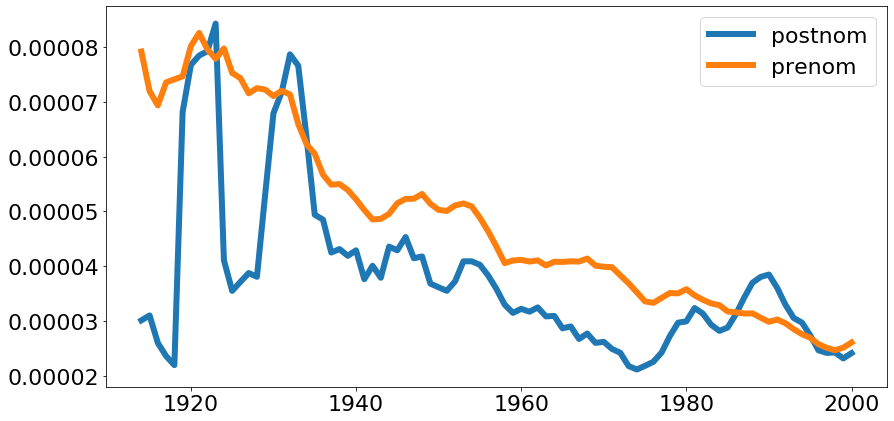

In [200]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


[('grunnen', 'grunn'), ('folket', 'folk'), ('ikken', 'ikke'), ('hånda', 'hånd'), ('selvet', 'selv'), ('hjelpa', 'hjelp'), ('arbeidet', 'arbeid'), ('målet', 'mål'), ('sien', 'si'), ('livet', 'liv'), ('kunden', 'kunde'), ('h-en', 'h'), ('hjemmet', 'hjem'), ('liggeren', 'ligger'), ('rommet', 'rom'), ('finneren', 'finner'), ('tallet', 'tall'), ('vista', 'vist'), ('skolen', 'skole')]


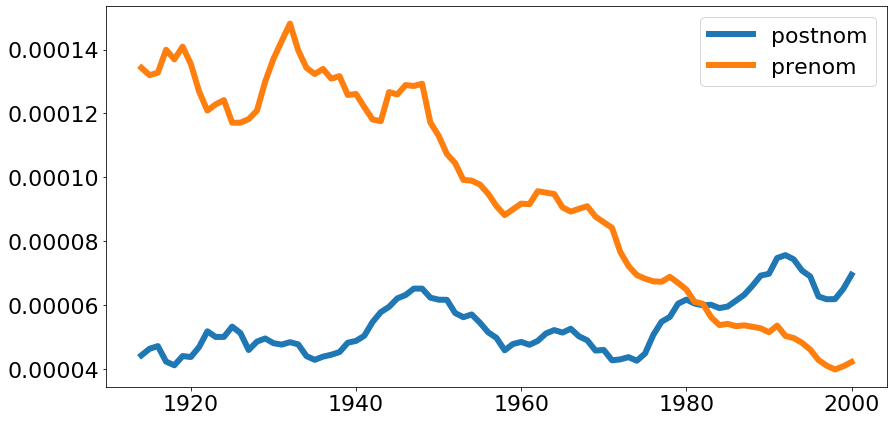

In [201]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


[('løpet', 'løp'), ('megeten', 'meget'), ('timen', 'time'), ('motet', 'mot'), ('ikken', 'ikke'), ('ea', 'e'), ('dåa', 'då'), ('historia', 'historie'), ('funnet', 'funn'), ('kommet', 'komme'), ('systemet', 'system'), ('alen', 'al'), ('stoet', 'sto'), ('laget', 'lag'), ('figuren', 'figur'), ('været', 'vær'), ('personen', 'person'), ('mora', 'mor'), ('gjelda', 'gjeld')]


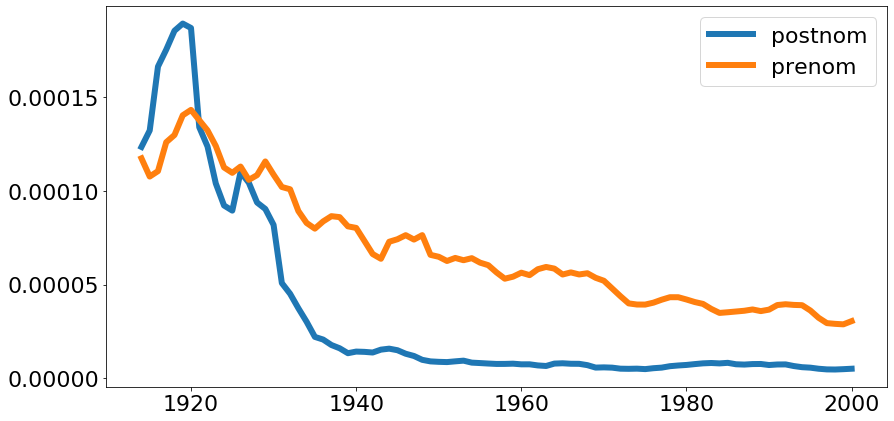

In [202]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


[('taket', 'tak'), ('velet', 'vel'), ('n-en', 'n'), ('høyet', 'høy'), ('kravet', 'krav'), ('fanten', 'fant'), ('ora', 'or'), ('kroppen', 'kropp'), ('visa', 'vise'), ('livet', 'liv'), ('rommet', 'rom'), ('j-en', 'j'), ('langa', 'lange'), ('toen', 'to'), ('gangen', 'gang'), ('u-en', 'u'), ('krafta', 'kraft'), ('timen', 'time'), ('omen', 'om')]


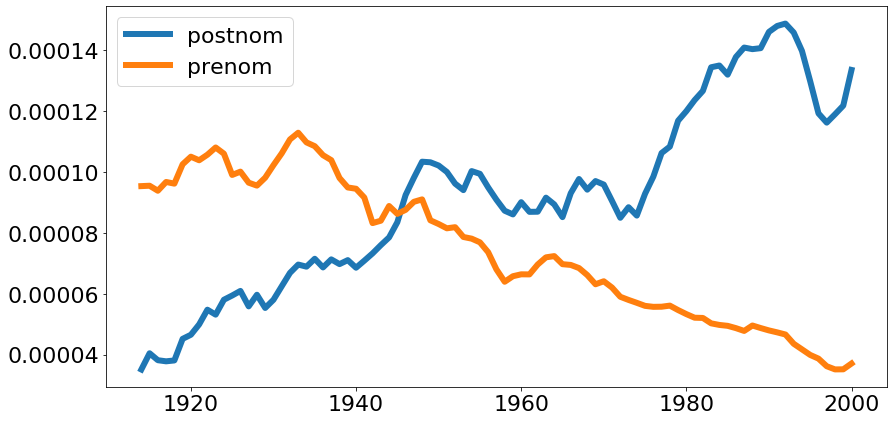

In [203]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


In [218]:
a_sample = sample_nouns(nouns, n= 500)

In [232]:
def convert_to_number(series):
    if series.empty:
        res = 0
    else:
        res = float(series)
    return res

In [240]:
samples_post = {w[0]:convert_to_number(nb.nb_ngram('{x} hans'.format(x = w[0]), years = (1910, 2000), smooth = 1).sum()) for w in a_sample}

In [241]:
samples_pre = {w[1]: convert_to_number(nb.nb_ngram('hans {x}'.format(x = w[1]), years = (1910, 2000), smooth = 1).sum()) for w in a_sample}

In [247]:
test_sample = list(set([p for p in a_sample if p[0] in pd.DataFrame.from_dict(samples_post, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(50).index]) |
set([p for p in a_sample if p[1] in pd.DataFrame.from_dict(samples_pre, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(50).index]))

In [248]:
pd.DataFrame.from_dict(samples_pre, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(5)

,freq
liv,0.087306
navn,0.081288
død,0.070463
ord,0.060522
mor,0.057811


[('været', 'vær'), ('gutten', 'gutt'), ('faren', 'fare'), ('barnet', 'barn'), ('interessen', 'interesse'), ('øyet', 'øye'), ('ønsket', 'ønske'), ('langa', 'lange'), ('målet', 'mål'), ('tankeren', 'tanker'), ('bringa', 'bringe'), ('evna', 'evne'), ('jobben', 'jobb'), ('herren', 'herre'), ('pusten', 'pust'), ('kontoret', 'kontor'), ('broren', 'bror'), ('stedet', 'sted'), ('eiendommen', 'eiendom'), ('livet', 'liv'), ('mora', 'mor'), ('foten', 'fot'), ('oppfatninga', 'oppfatning'), ('bilen', 'bil'), ('hatten', 'hatt'), ('meninga', 'mening'), ('hesten', 'hest'), ('huset', 'hus'), ('hela', 'hele'), ('ansiktet', 'ansikt'), ('viljen', 'vilje'), ('saka', 'sak'), ('presten', 'prest'), ('hjemmet', 'hjem'), ('armen', 'arm'), ('garden', 'garde'), ('båten', 'båt'), ('ordet', 'ord'), ('stillinga', 'stilling'), ('veien', 'vei'), ('personen', 'person'), ('brevet', 'brev'), ('alderen', 'alder'), ('hånda', 'hånd'), ('bordet', 'bord'), ('familien', 'familie'), ('benet', 'ben'), ('håret', 'hår'), ('talen',

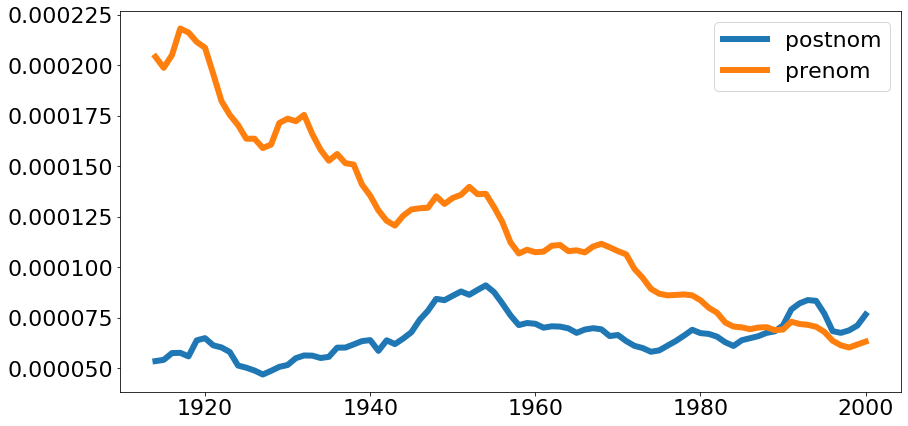

In [249]:
pairs = test_sample
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


In [250]:
test_sample_edited = [('gutten', 'gutt'), ('faren', 'fare'), ('barnet', 'barn'),
                      ('interessen', 'interesse'), ('øyet', 'øye'), ('ønsket', 'ønske'), 
                       ('målet', 'mål'), ('tankeren', 'tanker'), 
                      ('bringa', 'bringe'), ('evnen', 'evne'), ('jobben', 'jobb'), ('pusten', 'pust'), ('kontoret', 'kontor'),
                      ('broren', 'bror'), ('stedet', 'sted'), ('eiendommen', 'eiendom'), ('livet', 'liv'), ('mora', 'mor'), 
                      ('foten', 'fot'), ('oppfatninga', 'oppfatning'), ('bilen', 'bil'), 
                      ('hatten', 'hatt'), ('meninga', 'mening'), ('hesten', 'hest'), ('huset', 'hus'),  ('ansiktet', 'ansikt'), ('viljen', 'vilje'), ('saken', 'sak'), 
                      ('presten', 'prest'), ('hjemmet', 'hjem'), ('armen', 'arm'), ('gården', 'gård'), ('båten', 'båt'), ('ordet', 'ord'), 
                      ('stillingen', 'stilling'), ('veien', 'vei'), ('personen', 'person'), ('brevet', 'brev'), ('alderen', 'alder'), ('hånden', 'hånd'), 
                      ('bordet', 'bord'), ('familien', 'familie'), ('benet', 'ben'), ('håret', 'hår'), ('talen', 'tale'), ('rommet', 'rom'), 
                      ('hjertet', 'hjerte'), ('tida', 'tid'), ('folket', 'folk'), ('planen', 'plan'), ('stemmen', 'stem'), ('latteren', 'latter'), 
                      ('landet', 'land'), ('navnet', 'navn'), ('dattera', 'datter'), ('tanken', 'tanke'), ('arbeidet', 'arbeid'), ('blikket', 'blikk'), ('boka', 'bok'), 
                      ('verken', 'verk'), ('sønnen', 'sønn'), ('ryggen', 'rygg'), ('døden', 'død'), ('motet', 'mot'), ('skylda', 'skyld'), 
                      ('handa', 'hand'), ('arbeideren', 'arbeider'), ('forholdet', 'forhold'), ('kroppen', 'kropp'), ('svaret', 'svar'), ('skipet', 'skip')]

[('gutten', 'gutt'), ('faren', 'fare'), ('barnet', 'barn'), ('interessen', 'interesse'), ('øyet', 'øye'), ('ønsket', 'ønske'), ('målet', 'mål'), ('tankeren', 'tanker'), ('bringa', 'bringe'), ('evnen', 'evne'), ('jobben', 'jobb'), ('pusten', 'pust'), ('kontoret', 'kontor'), ('broren', 'bror'), ('stedet', 'sted'), ('eiendommen', 'eiendom'), ('livet', 'liv'), ('mora', 'mor'), ('foten', 'fot'), ('oppfatninga', 'oppfatning'), ('bilen', 'bil'), ('hatten', 'hatt'), ('meninga', 'mening'), ('hesten', 'hest'), ('huset', 'hus'), ('ansiktet', 'ansikt'), ('viljen', 'vilje'), ('saken', 'sak'), ('presten', 'prest'), ('hjemmet', 'hjem'), ('armen', 'arm'), ('gården', 'gård'), ('båten', 'båt'), ('ordet', 'ord'), ('stillingen', 'stilling'), ('veien', 'vei'), ('personen', 'person'), ('brevet', 'brev'), ('alderen', 'alder'), ('hånden', 'hånd'), ('bordet', 'bord'), ('familien', 'familie'), ('benet', 'ben'), ('håret', 'hår'), ('talen', 'tale'), ('rommet', 'rom'), ('hjertet', 'hjerte'), ('tida', 'tid'), ('fol

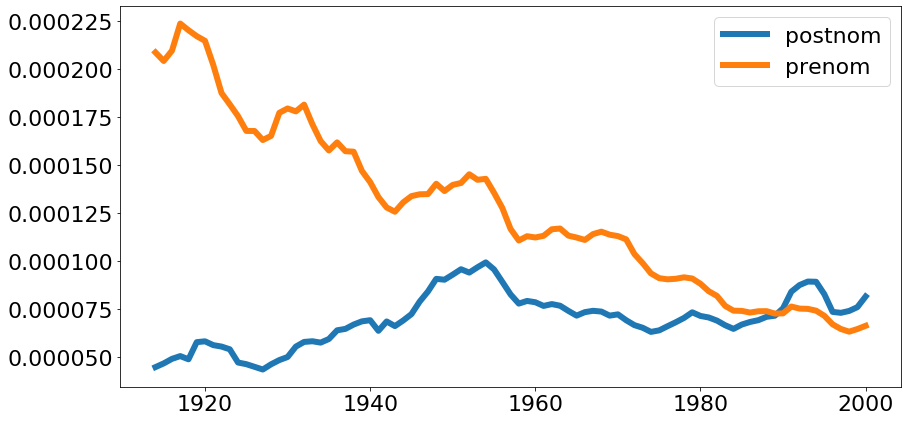

In [252]:
pairs = test_sample_edited
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();


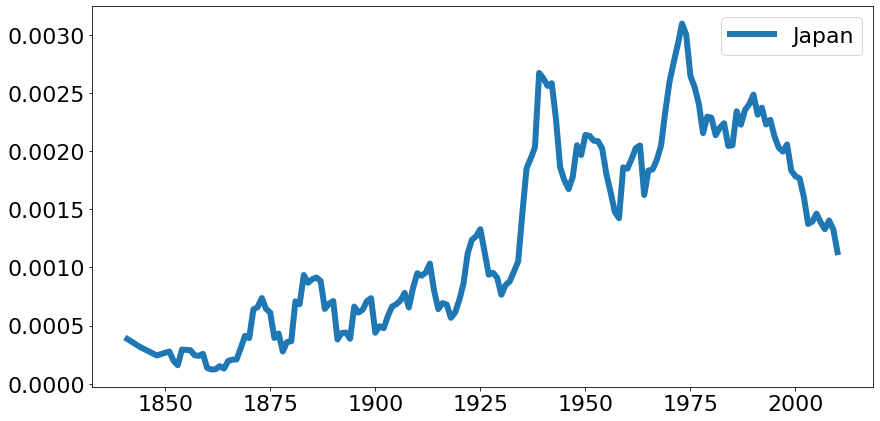

In [253]:
nb.nb_ngram("Japan", years = (1810, 2010), smooth=1).rolling(window=5).mean().plot();

[('ballen', 'ball'), ('middagen', 'middag'), ('vesken', 'vesken'), ('genseren', 'genser'), ('jakken', 'jakke'), ('pennen', 'penn'), ('bilen', 'bil'), ('båten', 'båt'), ('kniven', 'kniv'), ('bordet', 'bord'), ('stolen', 'stol'), ('sykkelen', 'sykkel'), ('skoene', 'sko'), ('bildet', 'bilde'), ('buksene', 'bukse'), ('huset', 'hus')]


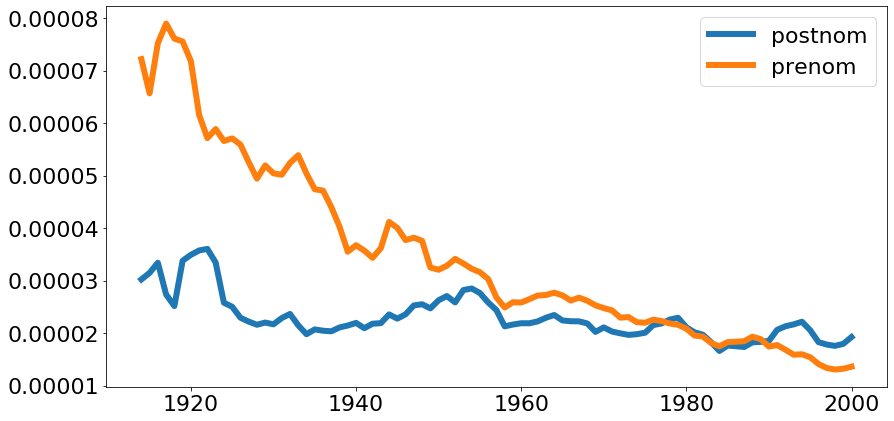

In [263]:
pairs = [('ballen', 'ball'), ('middagen', 'middag'), ('vesken','vesken'), ('genseren', 'genser'), 
         ('jakken', 'jakke'), ('pennen', 'penn'), ('bilen', 'bil'), ('båten', 'båt'), ('kniven', 'kniv'),
        ('bordet', 'bord'), ('stolen', 'stol'), ('sykkelen', 'sykkel'), ('skoene', 'sko'), ('bildet', 'bilde'),
        ('buksene', 'bukse'), ('huset', 'hus')]
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();

[('fienden', 'fiende'), ('vennen', 'venn'), ('venen', 'ven'), ('favoritten', 'favoritt'), ('kollegaen', 'kollega'), ('interessen', 'interesse')]


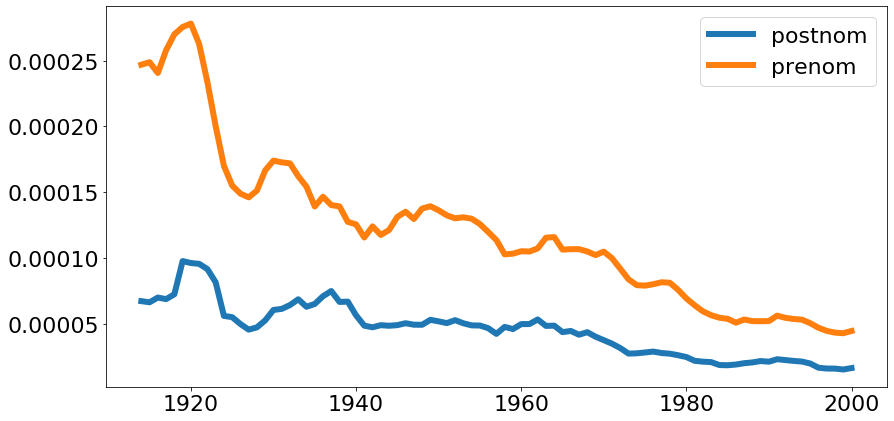

In [273]:
pairs = [('fienden', 'fiende'), ('vennen', 'venn'), ('venen', 'ven'),('favoritten','favoritt'), ('kollegaen', 'kollega'), 
     ('interessen', 'interesse')]
print(pairs)
pd.DataFrame(
    {'postnom': bigrams_cross([x[0] for x in pairs], gens),
     'prenom':bigrams_cross(gens, [x[1] for x in pairs])
    }).rolling(window=5).mean().plot();

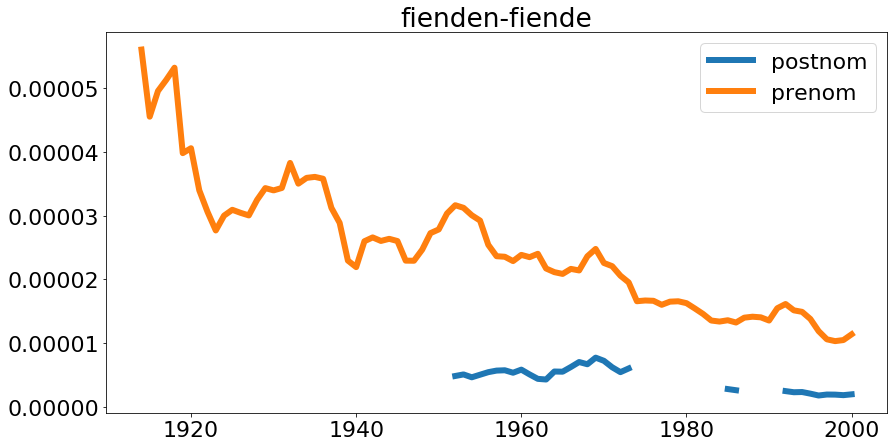

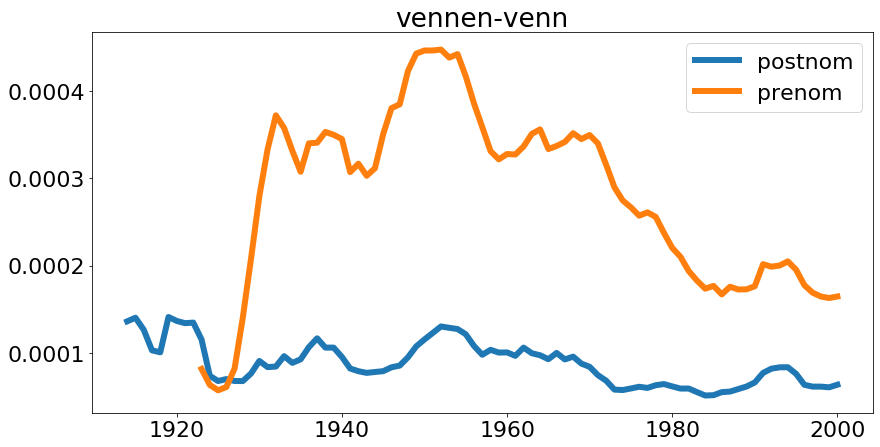

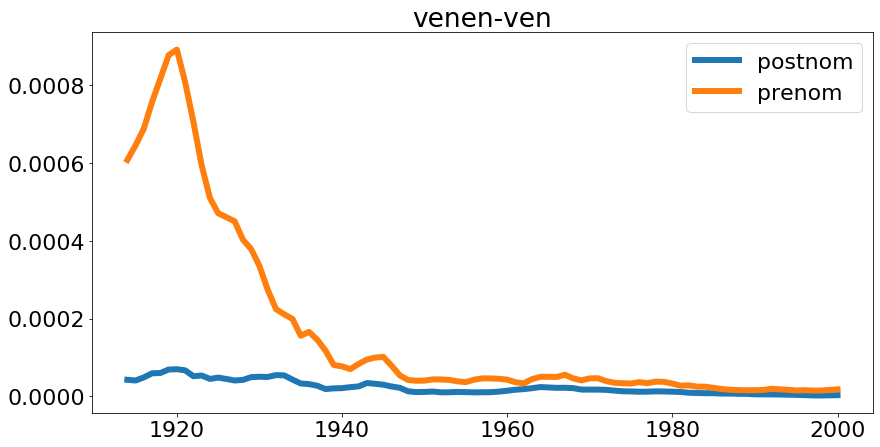

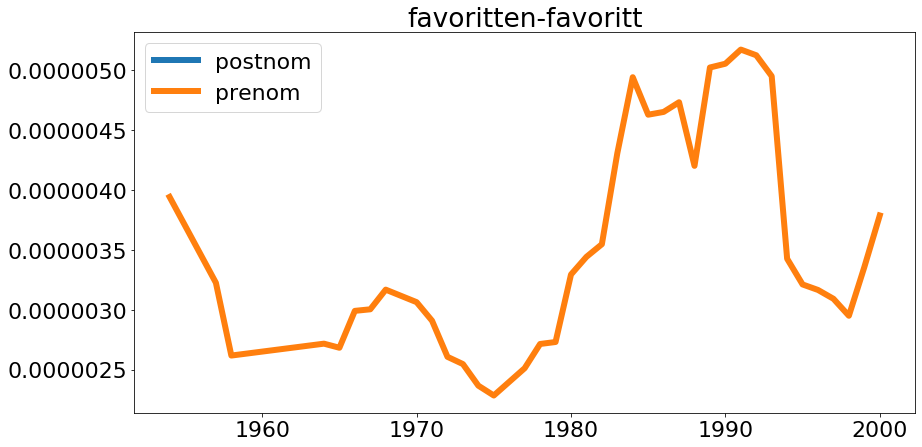

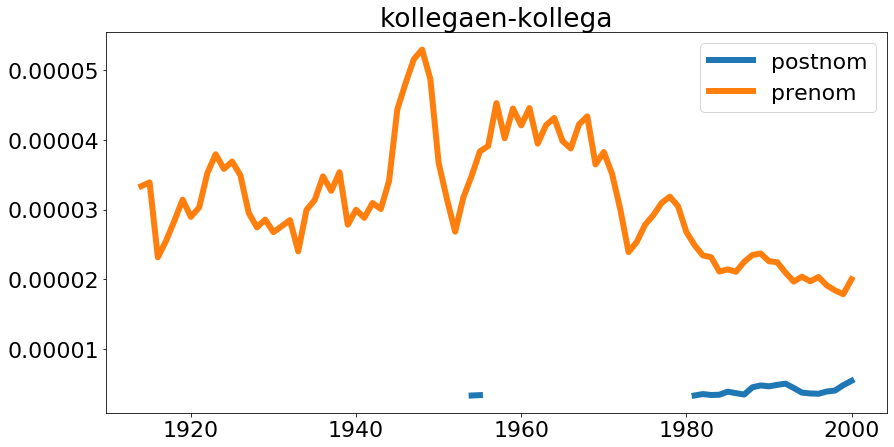

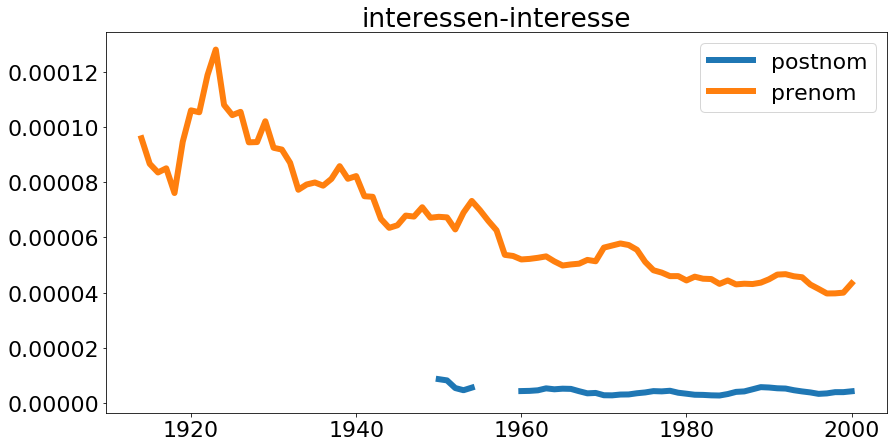

In [276]:
pairs = [('fienden', 'fiende'), ('vennen', 'venn'), ('venen', 'ven'), ('favoritten','favoritt'), ('kollegaen', 'kollega'), 
     ('interessen', 'interesse')]
for p in pairs:
    pd.DataFrame(
        {'postnom': bigrams_cross([p[0]], gens),
         'prenom':bigrams_cross(gens, [p[1]])
        }).rolling(window=5).mean().plot(title = '-'.join(p));